In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats

from sklearn.model_selection import train_test_split

In [2]:
# importing in the data

train = pd.read_csv("mnist_train.csv")

test = pd.read_csv("mnist_test.csv")

In [3]:
train.head()

y_train = train['label']

X_train =train.drop('label',axis=1)



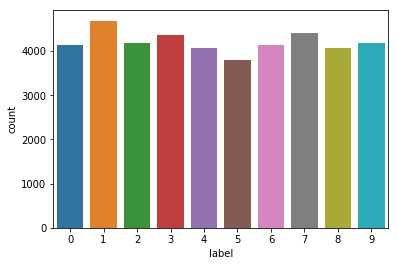

In [4]:
# taking a look at the y_train 

sns.countplot(y_train)

In [5]:

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [6]:
X_train.shape

(42000, 28, 28, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,Flatten,Dropout,MaxPool2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
y_train = to_categorical(y_train,num_classes=10)

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=1)

In [10]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,input_shape=(28,28,1),activation='relu'))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
          
        






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [12]:
adam = Adam()

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

In [13]:
BS=64
Epochs = 20

In [14]:
aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.1,
shear_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1)

aug.fit(X_train)

checkpoint=ModelCheckpoint('weights.{epoch:02d}-{val_acc:.2f}.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

early_stop=EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.fit_generator(aug.flow(X_train,y_train,batch_size=BS),validation_data=[X_val,y_val],
                    epochs=Epochs,verbose=2,steps_per_epoch=X_train.shape[0] // BS,
                   callbacks=[checkpoint,early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
 - 343s - loss: 1.0529 - acc: 0.7881 - val_loss: 0.0667 - val_acc: 0.9795
Epoch 2/20
 - 339s - loss: 0.1697 - acc: 0.9480 - val_loss: 0.0559 - val_acc: 0.9852
Epoch 3/20
 - 331s - loss: 0.1242 - acc: 0.9614 - val_loss: 0.0441 - val_acc: 0.9883
Epoch 4/20
 - 333s - loss: 0.1065 - acc: 0.9680 - val_loss: 0.0362 - val_acc: 0.9881
Epoch 5/20
 - 326s - loss: 0.0959 - acc: 0.9713 - val_loss: 0.0427 - val_acc: 0.9888
Epoch 6/20
 - 336s - loss: 0.0888 - acc: 0.9726 - val_loss: 0.0362 - val_acc: 0.9890
Epoch 7/20
 - 352s - loss: 0.0799 - acc: 0.9750 - val_loss: 0.0307 - val_acc: 0.9905
Epoch 8/20
 - 361s - loss: 0.0775 - acc: 0.9766 - val_loss: 0.0371 - val_acc: 0.9907
Epoch 9/20
 - 352s - loss: 0.0747 - acc: 0.9776 - val_loss: 0.0324 - val_acc: 0.9900
Epoch 10/20
 - 352s - loss: 0.0683 - acc: 0.9789 - val_loss: 0.0333 - val_acc: 0.9924
Epoch 11/20
 - 372s - loss: 0.0673 - acc: 0.9795 - val_

In [16]:
predictions=model.predict_classes(test)

In [ ]:
predictions.shape

In [17]:
submission= pd.DataFrame(
predictions,columns=['Label'])

In [18]:
submission['ImageId'] = range(1,28001)

In [ ]:
submission.tail()

In [19]:
submission=submission[['ImageId','Label']]

In [20]:
submission.to_csv('mnist_submission.csv',index=False)